In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

%matplotlib inline

In [2]:
df = pd.read_csv("~/desktop/metis_data_camp/Regression/Project/zillow_table.csv")
df.drop(['Unnamed: 0'], axis =1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         620 non-null    float64
 1   hometypes      620 non-null    object 
 2   bathrooms      620 non-null    float64
 3   bedrooms       620 non-null    float64
 4   sizes          620 non-null    float64
 5   garage         620 non-null    float64
 6   school_rating  620 non-null    float64
 7   city           620 non-null    object 
 8   ages           620 non-null    float64
dtypes: float64(7), object(2)
memory usage: 43.7+ KB


### Numeric features

In [3]:
df_numeric = df.drop(['hometypes', 'city'], axis =1)
df_numeric2 = df_numeric.copy()


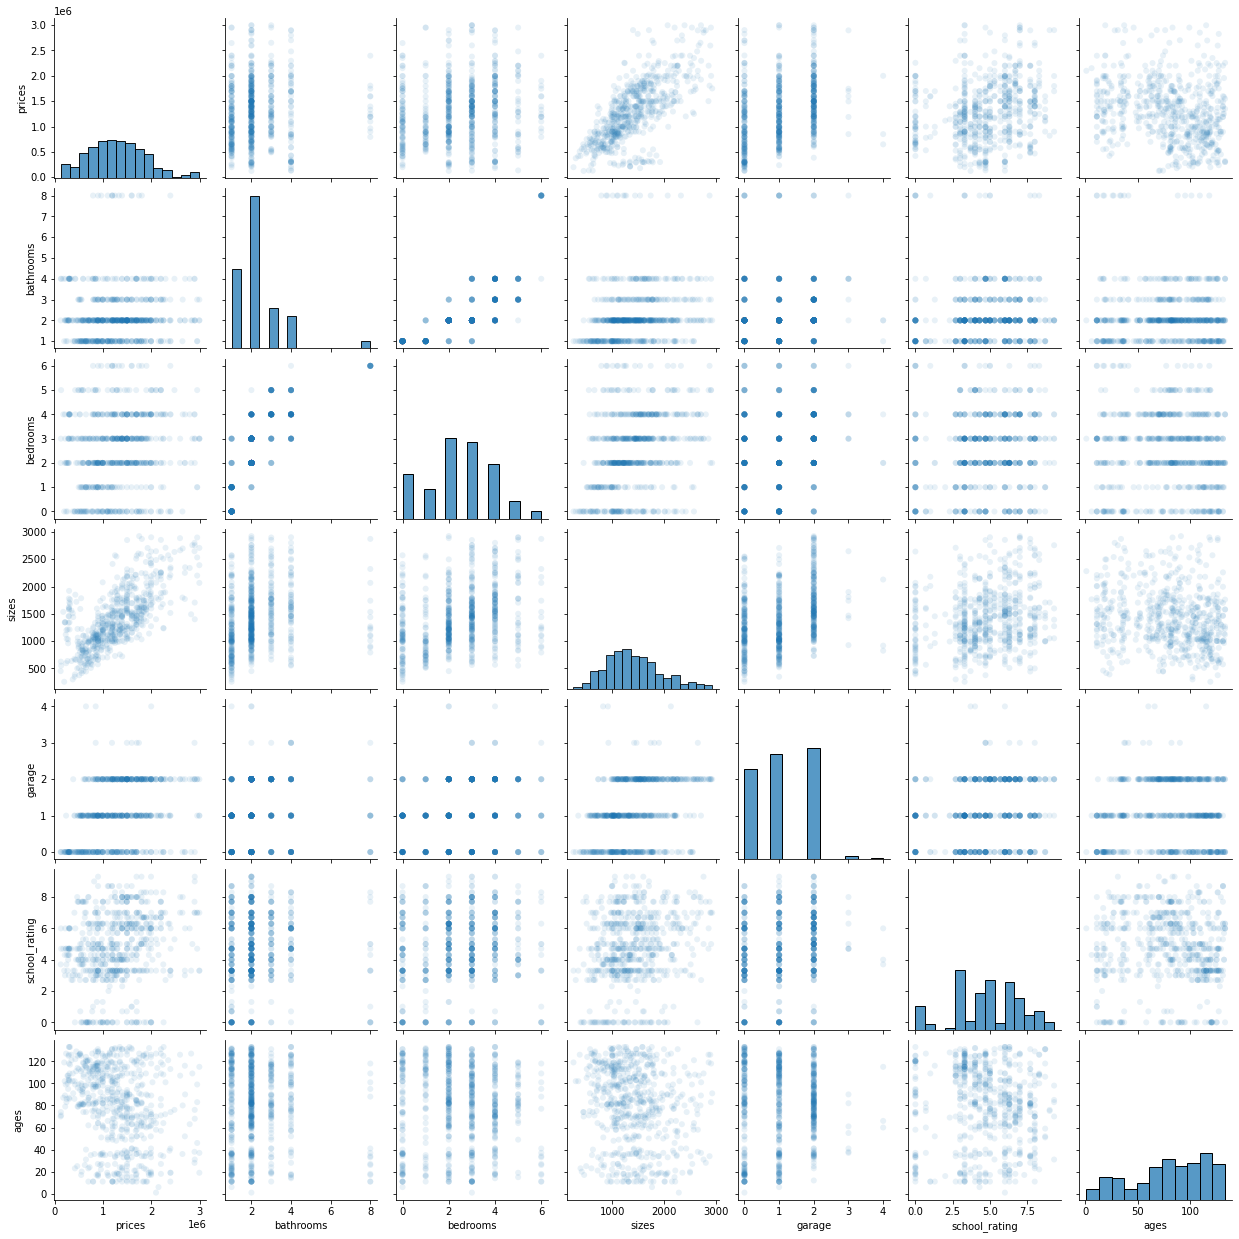

In [7]:
sns.pairplot(df_numeric, plot_kws=dict(alpha=.1, edgecolor='none'))


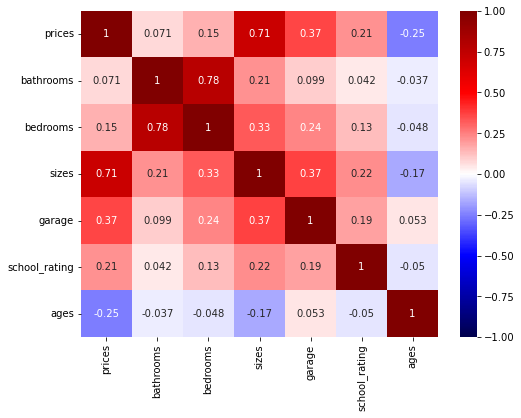

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

### catergorical features

In [9]:
df = pd.read_csv("~/desktop/metis_data_camp/Regression/Project/zillow_table.csv")
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [10]:
h_count = df['hometypes'].value_counts()
other_ht = list(h_count[h_count <= 33].index)
df['hometypes'] = df['hometypes'].replace(other_ht, 'multi-family')
df_dummies_ht = pd.get_dummies(df['hometypes'],drop_first=True)

In [11]:
c_count = df['city'].value_counts()
other_c = list(c_count[c_count <= 10].index)
df['city'] = df['city'].replace(other_c, 'Campbell')
df_dummies_c = pd.get_dummies(df['city'],drop_first=True)

In [12]:
df_dummies = pd.concat([df.prices, df_dummies_ht, df_dummies_c], axis = 1)

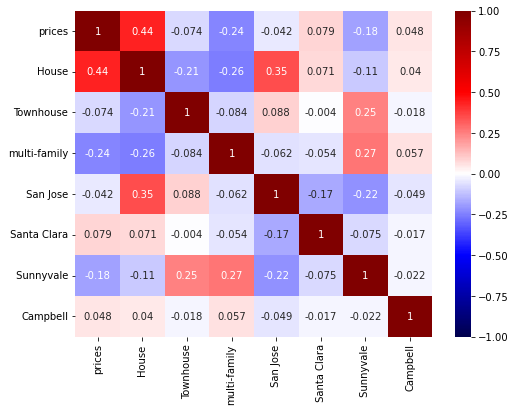

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df_dummies.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [14]:
df_all = pd.concat([df, df_dummies_ht, df_dummies_c], axis = 1)

### Model I (all features)

In [15]:
df_X1 = df_all.drop(['prices', 'city', 'hometypes'], 1)

/var/folders/rg/kpn3fy794p9cgdns5sjmpzr80000gp/T/ipykernel_65798/3265199046.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_X1 = df_all.drop(['prices', 'city', 'hometypes'], 1)


In [16]:
print(df_X1.columns)

Index(['bathrooms', 'bedrooms', 'sizes', 'garage', 'school_rating', 'ages',
       'House', 'Townhouse', 'multi-family', ' San Jose', ' Santa Clara',
       ' Sunnyvale', 'Campbell'],
      dtype='object')


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(df_X1.values)
df_X1_std = std.transform(df_X1.values)

df_X1_std = pd.DataFrame(df_X1_std)


df_X1_std.columns =['bathrooms', 'bedrooms', 'sizes', 'garage', 'school_rating', 'ages',
       'House', 'Townhouse', 'multi-family', ' San Jose', ' Santa Clara',
       ' Sunnyvale', 'Campbell']

In [18]:
y1 = df_all.prices
X1 = df_X1_std
X1_const = sm.add_constant(X1)
model = sm.OLS(y1,X1_const)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     86.88
Date:                Wed, 18 May 2022   Prob (F-statistic):          5.48e-129
Time:                        14:46:46   Log-Likelihood:                -8793.6
No. Observations:                 620   AIC:                         1.762e+04
Df Residuals:                     606   BIC:                         1.768e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.294e+06   1.42e+04     91.118      0.000    1.27e+06    1.32e+06
bathrooms     -3.033e+04   2.51e+04     -1.210      0.227   -7.95e+04    1.89e+04
bedrooms       2.321e+04   2.77e+04      0.838      0.402   -3.12e+04    7.76e+04
sizes          3.822e+05   1.78e+04     21.437      0.000    3.47e+05    4.17e+05
garage         5.174e+04   1.77e+04      2.925      0.004     1.7e+04    8.65e+04
school_rating  5.576e+04   1.53e+04      3.642      0.000    2.57e+04    8.58e+04
ages          -2.416e+04   1.63e+04     -1.478      0.140   -5.63e+04    7933.919
House          5.823e+04   2.11e+04      2.759      0.006    1.68e+04    9.97e+04
Townhouse     -2.185e+04   1.63e+04     -1.336      0.182    -5.4e+04    1.03e+04
multi-family  -1.237e+05   1.66e+04     -7.451      0.000   -1.56e+05   -9.11e+04
 San Jose     -1.478e+05   2.01e+04     -7.367      0.000   -1.87e+05   -1.08e+05
 Santa Clara  -1.319e+04   1.53e+04     -0.861      0.390   -4.33e+04    1.69e+04
 Sunnyvale    -8.662e+04   1.73e+04     -5.018      0.000   -1.21e+05   -5.27e+04
Campbell      -5889.9901   1.44e+04     -0.408      0.683   -3.42e+04    2.24e+04
==============================================================================
Omnibus:                       84.400   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.379
Skew:                           0.747   Prob(JB):                     7.53e-42
Kurtosis:                       5.258   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model II (Remove features containing the coefficients with low significant)

In [19]:
df_X2 = df_all.drop(['prices', 'city', 'hometypes','bathrooms', 'bedrooms', ' Santa Clara', 'Campbell', 'Townhouse'], 1)
print(df_X2.columns)

Index(['sizes', 'garage', 'school_rating', 'ages', 'House', 'multi-family',
       ' San Jose', ' Sunnyvale'],
      dtype='object')


/var/folders/rg/kpn3fy794p9cgdns5sjmpzr80000gp/T/ipykernel_65798/4192080639.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_X2 = df_all.drop(['prices', 'city', 'hometypes','bathrooms', 'bedrooms', ' Santa Clara', 'Campbell', 'Townhouse'], 1)


In [20]:
std = StandardScaler()
std.fit(df_X2.values)
df_X2_std = std.transform(df_X2.values)

df_X2_std = pd.DataFrame(df_X2_std)


df_X2_std.columns =['sizes', 'garage', 'school_rating', 'ages', 'House', 
       'multi-family', ' San Jose', ' Sunnyvale']

In [21]:
y2 = df_all.prices
X2 = df_X2_std
X2_const = sm.add_constant(df_X2_std)
model = sm.OLS(y2,X2_const)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 18 May 2022   Prob (F-statistic):          2.68e-133
Time:                        14:46:50   Log-Likelihood:                -8795.7
No. Observations:                 620   AIC:                         1.761e+04
Df Residuals:                     611   BIC:                         1.765e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.294e+06   1.42e+04     91.182      0.000    1.27e+06    1.32e+06
sizes          3.795e+05    1.7e+04     22.320      0.000    3.46e+05    4.13e+05
garage         4.537e+04   1.72e+04      2.631      0.009    1.15e+04    7.92e+04
school_rating  5.395e+04   1.51e+04      3.577      0.000    2.43e+04    8.36e+04
ages          -2.487e+04    1.6e+04     -1.553      0.121   -5.63e+04    6587.978
House          6.873e+04   1.92e+04      3.588      0.000    3.11e+04    1.06e+05
multi-family  -1.194e+05    1.6e+04     -7.442      0.000   -1.51e+05   -8.79e+04
 San Jose     -1.431e+05   1.65e+04     -8.693      0.000   -1.75e+05   -1.11e+05
 Sunnyvale    -9.352e+04   1.56e+04     -5.995      0.000   -1.24e+05   -6.29e+04
==============================================================================
Omnibus:                       84.158   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.969
Skew:                           0.752   Prob(JB):                     6.83e-41
Kurtosis:                       5.213   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model III (square transformation of age features)

In [22]:
df_X3_std = df_X2_std.copy()
df_X3_std['ages_squared'] = df_X3_std['ages']**2 
df_X3_std.columns

Index(['sizes', 'garage', 'school_rating', 'ages', 'House', 'multi-family',
       ' San Jose', ' Sunnyvale', 'ages_squared'],
      dtype='object')

In [24]:
y3 = df_all.prices
X3 = df_X3_std
X3_const = sm.add_constant(df_X3_std)
model = sm.OLS(y3,X3_const)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 18 May 2022   Prob (F-statistic):          2.17e-134
Time:                        14:47:17   Log-Likelihood:                -8790.6
No. Observations:                 620   AIC:                         1.760e+04
Df Residuals:                     610   BIC:                         1.765e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.238e+06   2.23e+04     55.421      0.000    1.19e+06    1.28e+06
sizes          3.698e+05   1.72e+04     21.557      0.000    3.36e+05    4.03e+05
garage         5.514e+04   1.74e+04      3.170      0.002     2.1e+04    8.93e+04
school_rating      6e+04   1.51e+04      3.977      0.000    3.04e+04    8.96e+04
ages           1253.0779   1.79e+04      0.070      0.944   -3.39e+04    3.64e+04
House           8.54e+04   1.97e+04      4.331      0.000    4.67e+04    1.24e+05
multi-family  -1.195e+05   1.59e+04     -7.501      0.000   -1.51e+05   -8.82e+04
 San Jose     -1.328e+05   1.67e+04     -7.968      0.000   -1.66e+05      -1e+05
 Sunnyvale    -8.698e+04   1.56e+04     -5.568      0.000   -1.18e+05   -5.63e+04
ages_squared   5.537e+04   1.73e+04      3.192      0.001    2.13e+04    8.94e+04
==============================================================================
Omnibus:                       81.081   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.694
Skew:                           0.728   Prob(JB):                     2.60e-39
Kurtosis:                       5.181   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model IV (Remove age, age_squared)

In [25]:


df_X4_std = df_X3_std.drop(['ages', 'ages_squared'], 1)


df_X4_std.columns

y4 = df_all.prices
X4 = df_X4_std
X4_const = sm.add_constant(df_X4_std)
model = sm.OLS(y4,X4_const)
fit = model.fit()
fit.summary()

/var/folders/rg/kpn3fy794p9cgdns5sjmpzr80000gp/T/ipykernel_65798/3675106703.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_X4_std = df_X3_std.drop(['ages', 'ages_squared'], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 18 May 2022   Prob (F-statistic):          6.76e-134
Time:                        14:47:21   Log-Likelihood:                -8796.9
No. Observations:                 620   AIC:                         1.761e+04
Df Residuals:                     612   BIC:                         1.765e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.294e+06   1.42e+04     91.078      0.000    1.27e+06    1.32e+06
sizes          3.814e+05    1.7e+04     22.464      0.000    3.48e+05    4.15e+05
garage         3.983e+04   1.69e+04      2.357      0.019    6648.038     7.3e+04
school_rating  5.531e+04   1.51e+04      3.670      0.000    2.57e+04    8.49e+04
House          7.963e+04   1.78e+04      4.462      0.000    4.46e+04    1.15e+05
multi-family  -1.201e+05   1.61e+04     -7.478      0.000   -1.52e+05   -8.86e+04
 San Jose     -1.491e+05    1.6e+04     -9.300      0.000   -1.81e+05   -1.18e+05
 Sunnyvale    -9.724e+04   1.54e+04     -6.301      0.000   -1.28e+05   -6.69e+04
==============================================================================
Omnibus:                       75.014   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.153
Skew:                           0.694   Prob(JB):                     7.49e-35
Kurtosis:                       5.039   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# comfirm the R2 from statsmodel module with R2 from linear regression package
def split_and_cv(X_train, y_train):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    kf = KFold(n_splits=5,
               shuffle=True, 
               random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

    lm_cv = cross_val_score(lr_model, X_train, y_train, 
                             cv= kf, 
                             scoring='r2') 
    print('Simple regression scores: ', lm_cv)
    print('Simple mean cv r^2: ', np.round(np.mean(lm_cv), 3), "+-", np.round(np.std(lm_cv),3))    
    print('Feature coefficient results: \n')
    for feature, coef in zip(X3.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [27]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X4, y4, 
                                       test_size=.2,     
                                       random_state=6)
std.fit(X_train3.values)
std.fit(X_test3.values)
X_tr3 = std.transform(X_train3.values)
X_te3 = std.transform(X_test3.values)





split_and_cv(X_tr3, y_train3)

lm_3 = LinearRegression()
lm_3.fit(X_tr3, y_train3)
train_score = lm_3.score(X_tr3, y_train3)
test_score = lm_3.score(X_te3, y_test3)
print('\nTrain Score: ', lm_3.score(X_tr3, y_train3))
print('Test Score: ', lm_3.score(X_te3, y_test3))

Simple regression scores:  [0.59038103 0.55099055 0.75102376 0.60313176 0.66595448]
Simple mean cv r^2:  0.632 +- 0.07
Feature coefficient results: 

sizes : 392453.33
garage : 34486.36
school_rating : 68148.61
ages : 82336.50
House : -101822.49
multi-family : -147180.63
 San Jose : -56665.62

Train Score:  0.6463981967862598
Test Score:  0.6449049097923325


### Lasso regularization

In [28]:
alphalist = 10**(np.linspace(2, 4, 20))
err_vec_val = np.zeros(len(alphalist))


for i,curr_alpha in enumerate(alphalist):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 0)
    lasso_model = Lasso(alpha = curr_alpha)
    
    lasso_cv = cross_val_score(lasso_model, X_tr3, y_train3, cv= kf, scoring='r2')

    err_vec_val[i] = np.mean(lasso_cv)
    

Text(0.5, 0, 'alpha of Lasso model')

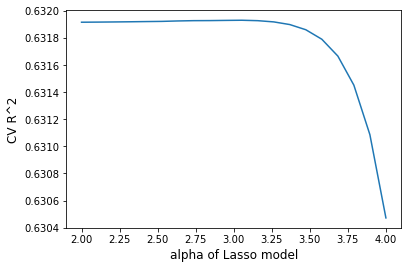

In [29]:
plt.plot(np.log10(alphalist), err_vec_val)
plt.ylabel('CV R^2', fontsize = 12)
plt.xlabel('alpha of Lasso model', fontsize = 12)

In [30]:
np.max(err_vec_val)

0.6319288144182311

In [31]:
alphalist[np.argmax(err_vec_val)]

1128.8378916846884

In [32]:
lasso_model = Lasso(alpha = 1128.83789)
lasso_model.fit(X_tr3,y_train3)

Lasso(alpha=1128.83789)

In [33]:
lasso_model.coef_

array([ 391845.98948465,   34010.22458407,   66646.83608165,
         81399.13139577, -101526.25092588, -145110.93008513,
        -56013.98923749])

In [34]:
lm_3.coef_

array([ 392453.33468905,   34486.36296596,   68148.60778555,
         82336.50063083, -101822.49288508, -147180.63171605,
        -56665.62429953])

In [35]:
Dict = {}
for feature, coef in zip(X4.columns,  lasso_model.coef_):
    Dict[feature] = coef


In [36]:
f = sorted(Dict.items(), key = lambda kv: kv[1], reverse = True)


In [37]:
values = [i[1] for i in f]
keys = [i[0] for i in f]

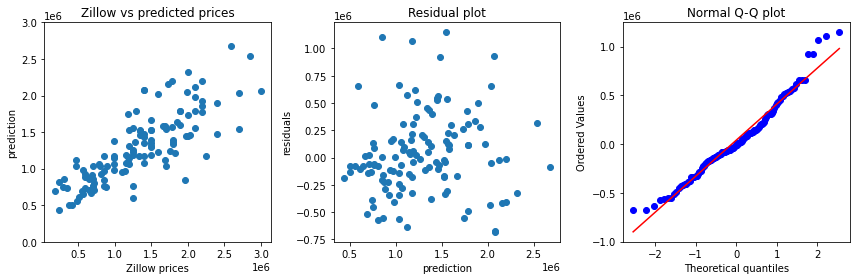

In [38]:
### Model evaluation

fig = plt.figure(figsize = (12, 4))


#1
plt.subplot(1,3,1)

plt.scatter(y_test3, lasso_model.predict(X_te3))
plt.ylim(0, 3e6)
plt.xlabel("Zillow prices")
plt.ylabel("prediction")
plt.title("Zillow vs predicted prices", fontsize = 12)
#2
plt.subplot(1, 3, 2)
res = y_test3 - lasso_model.predict(X_te3)
plt.scatter(lasso_model.predict(X_te3), res)
plt.title("Residual plot", fontsize = 12)
plt.xlabel("prediction")
plt.ylabel("residuals")

#3
import scipy.stats as stats
plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
stats.probplot(res, dist="norm", plot=plt)


plt.title("Normal Q-Q plot", fontsize = 12)
fig.tight_layout()

In [39]:
r2_score(y_train3, lasso_model.predict(X_tr3))

0.6463764530374263

In [40]:
r2_score(y_test3, lasso_model.predict(X_te3))

0.644737513953368

In [41]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [42]:
mae(y_test3, lasso_model.predict(X_te3))

280945.988219247

### Comparison of the importance of the features

In [44]:
from sklearn.linear_model import lars_path

In [45]:
alphas, _, coefs = lars_path(X_tr3, y_train3.values, method='lasso')

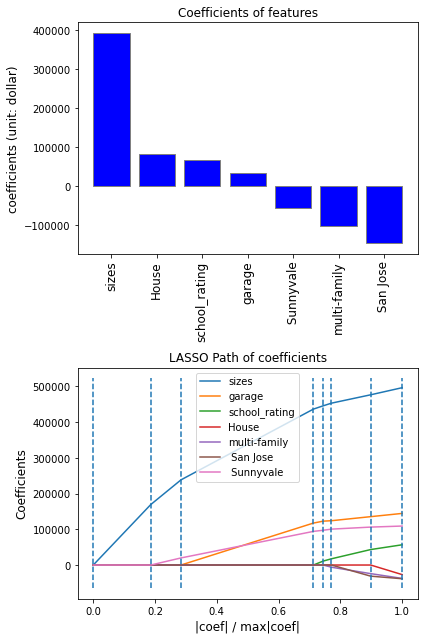

In [46]:
fig = plt.figure(figsize = (6, 9))



# 1
plt.subplot(2,1,1)
plt.bar(keys, values, color ='b',
        edgecolor ='grey')


plt.ylabel('coefficients (unit: dollar)', fontsize = 12)

plt.xticks(fontsize = 12, rotation =90)
plt.title('Coefficients of features')
# 2
plt.subplot(2,1,2)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|', fontsize = 12)
plt.ylabel('Coefficients', fontsize = 12)
plt.title('LASSO Path of coefficients')
plt.axis('tight')
plt.legend(X_train3.columns)

fig.tight_layout()



In [47]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_tr3, y_train3) 

RandomForestRegressor(n_estimators=300, random_state=0)

In [48]:
r2_score(y_train3, lasso_model.predict(X_tr3))

0.6463764530374263

In [49]:
mae(y_test3, lasso_model.predict(X_te3))

280945.988219247

In [50]:
r2_score(y_train3, regressor.predict(X_tr3))

0.9520495812016357

In [51]:
mae(y_test3, regressor.predict(X_te3))

237146.8295602919